## Load Dataset

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('heart_super_clean.csv')
print("Number of rows: ", df.shape[0])
print("Number of columns: ", len(df.columns))
print("Sample of data: ")
df.head()

Number of rows:  918
Number of columns:  16
Sample of data: 


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,49,160,180,0,156,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,37,130,283,0,98,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,48,138,214,0,108,1.5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
4,54,150,195,0,122,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


## Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


## Model Training

In [ ]:
from imp import KNN

k = int(np.sqrt(len(X_train)))

if k % 2 == 0:
    k +=1

knn = KNN(k)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(f"Accuracy: {score: .2f}%")


Accuracy:  85.87%


## Visualization

<Axes: xlabel='Class', ylabel='count'>

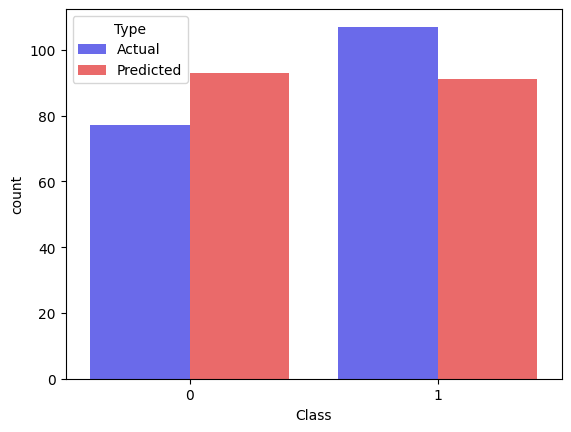

In [6]:
import seaborn as sns

predictions = knn.predict(X_test)

df_vis = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})
df_vis = df_vis.melt(var_name='Type', value_name='Class')
sns.countplot(data=df_vis, x='Class', hue='Type', palette='seismic')